# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
#url setup
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#create lists and variables
city_name = []
lat = []
lng = []
country = []
date = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
count = 1
set = 1

#begin print statement
print(f"Beginning Data Retrieval")   
print("-"*40)

#loop through cities and print out record, city number, and city name
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['main']['humidity'])
        
        print(f"Processing Record {count} of Set {set} | City ID: {response['id']} | City Name: {response['name']}") 
        
        count += 1
        
        if count == 51:
            count = 1
            set += 1
   
    except:
        print(f"City not found. Skipping...")
        continue
        
#end print statement
print("-"*40)
print(f"Data Retrieval Complete")   
print("-"*40)

Beginning Data Retrieval
----------------------------------------
Processing Record 1 of Set 1 | City ID: 3369157 | City Name: Cape Town
Processing Record 2 of Set 1 | City ID: 2084442 | City Name: Vanimo
Processing Record 3 of Set 1 | City ID: 3843123 | City Name: Neuquén
Processing Record 4 of Set 1 | City ID: 4035715 | City Name: Avarua
Processing Record 5 of Set 1 | City ID: 2126710 | City Name: Beringovskiy
Processing Record 6 of Set 1 | City ID: 2206939 | City Name: Bluff
Processing Record 7 of Set 1 | City ID: 6316343 | City Name: Alta Floresta
Processing Record 8 of Set 1 | City ID: 2017155 | City Name: Saskylakh
Processing Record 9 of Set 1 | City ID: 5880054 | City Name: Barrow
Processing Record 10 of Set 1 | City ID: 935215 | City Name: Saint-Philippe
Processing Record 11 of Set 1 | City ID: 1735106 | City Name: George Town
Processing Record 12 of Set 1 | City ID: 1793511 | City Name: Taiyuan
City not found. Skipping...
Processing Record 13 of Set 1 | City ID: 1006984 | City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
#build weather dictionary
weather_dict = {
    'City': city_name,
    'Lat': lat,
    'Lng': lng,
    'Country': country,
    'Date': date,
    'Max Temp': temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed    
}

#create a DataFrame from the dictionary
weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          583
Lat           583
Lng           583
Country       583
Date          583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
dtype: int64

In [29]:
# Save data frame to CSV
weather_df.to_csv('weather_data.csv')

# Display data frame head 
weather_df.head()

,City,Lat,Lng,Country,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,-33.9258,18.4232,ZA,1657899713,64.81,76,0,76
1,Vanimo,-2.6741,141.3028,PG,1657899713,76.86,91,86,91
2,Neuquén,-38.9516,-68.0591,AR,1657899554,39.09,87,75,87
3,Avarua,-21.2078,-159.7750,CK,1657899714,73.45,60,75,60
4,Beringovskiy,63.0500,179.3167,RU,1657899714,46.22,82,43,82


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
filtered_df = weather_df[weather_df['Humidity'] > 100]
filtered_df.count()

City          0
Lat           0
Lng           0
Country       0
Date          0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
dtype: int64

In [39]:
#  Get the indices of cities that have humidity over 100%.

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

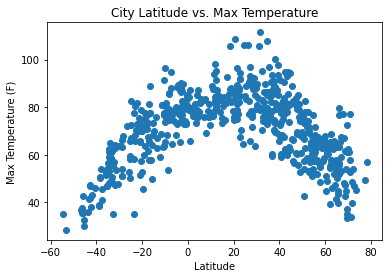

In [42]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp']);
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude');
plt.ylabel('Max Temperature (F)');

plt.savefig("CityLatitudevsMaxTemperature.png")

The plot above is showing the maximum temperature compared to the latitude of the location. As you can see from the graph as we approach the equator the temperature rises which makes sense as that is the equator is the closest point to the sun.

## Latitude vs. Humidity Plot

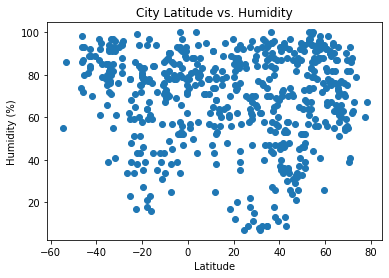

In [43]:
plt.scatter(weather_df['Lat'], weather_df['Humidity']);
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude');
plt.ylabel('Humidity (%)');

plt.savefig("CityLatitudevsHumidity.png")

The plot above is showing humidity compared to the latitude of the location. We can see that there is generally more humidity as you approach the extremes of the north pole, south pole, and the equator. I'm not sure there is enough data here to draw a definitive conclusion.

## Latitude vs. Cloudiness Plot

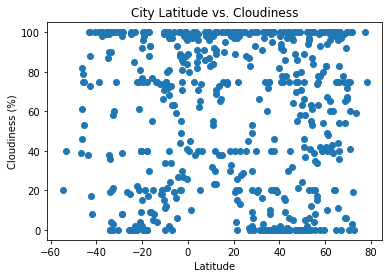

In [44]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness']);
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude');
plt.ylabel('Cloudiness (%)');

plt.savefig("CityLatitudevsCloudiness.png")

The plot above is showing cloudiness compared to the latitude of the location. We can see that there is some clustering at the extremes of cloudiness with exceptions again for the north pole, south pole, and the equator where we see more clouds.

## Latitude vs. Wind Speed Plot

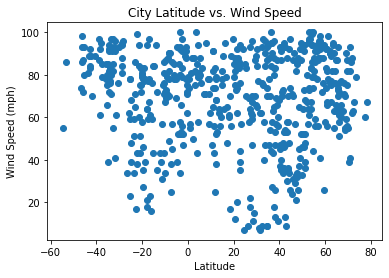

In [45]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed']);
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude');
plt.ylabel('Wind Speed (mph)');

plt.savefig("CityLatitudevsWindSpeed.png")

The plot above is showing wind speed compared to the latitude of the location. We can see that there is some clustering at the high end of wind speed (60mph and above).

## Linear Regression

In [46]:
#split the dataset into northern and souther hemisphere
north_df = weather_df[weather_df.Lat >= 0]
south_df = weather_df[weather_df.Lat < 0]

# Convert column datatypes to accomodate calculations
#north_df['Lat'] = north_df['Lat'].astype('float64')
#north_df['Max Temp'] = north_df['Max Temp'].astype('float64')
#north_df['Humidity'] = north_df['Humidity'].astype('float64')
#north_df['Cloudiness'] = north_df['Cloudiness'].astype('float64')
#north_df['Wind Speed'] = north_df['Wind Speed'].astype('float64')

#south_df['Lat'] = south_df['Lat'].astype('float64')
#south_df['Max Temp'] = south_df['Max Temp'].astype('float64')
#south_df['Humidity'] = south_df['Humidity'].astype('float64')
#south_df['Cloudiness'] = south_df['Cloudiness'].astype('float64')
#south_df['Wind Speed'] = south_df['Wind Speed'].astype('float64')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.6641791896047871


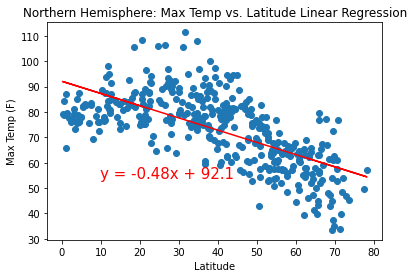

In [48]:
#correlation coefficient
r_north_lat_max_temp = north_df['Lat'].corr(north_df['Max Temp'])

#label the plot and add linear regression line
x_values = north_df['Lat']
y_values = north_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the information and label
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(100, 100),xycoords='figure points',fontsize=15,color="red");
plt.title('Northern Hemisphere: Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude');
plt.ylabel('Max Temp (F)');

print(f"The r value is: {r_north_lat_max_temp}")
plt.savefig("NorthMaxTempvsLatitudeRegression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.8344666465854912


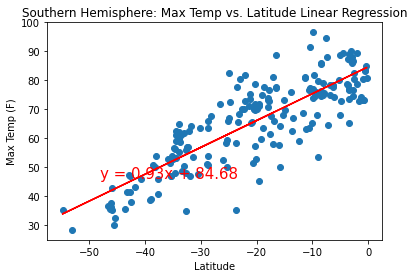

In [49]:
#correlation coefficient
r_south_lat_max_temp = south_df['Lat'].corr(south_df['Max Temp'])

#label the plot and add linear regression line
x_values = south_df['Lat']
y_values = south_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the information and label
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(100, 100),xycoords='figure points',fontsize=15,color="red");
plt.title('Southern Hemisphere: Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude');
plt.ylabel('Max Temp (F)');

print(f"The r value is: {r_south_lat_max_temp}")
plt.savefig("SouthMaxTempvsLatitudeRegression.png")

The charts above show the relationship between latitude and max temperature separated in to the northern and souther hemispheres. We can see that as we approach the equator temperature increases and as we get towards the poles temperature decreases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.05515157287034448


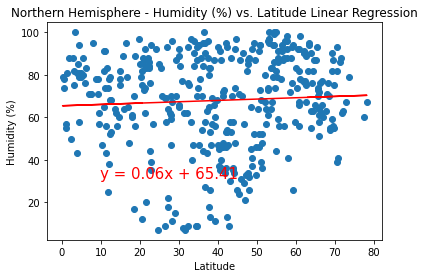

In [50]:
#correlation coefficient
r_north_lat_humidity = north_df['Lat'].corr(north_df['Humidity'])

#label the plot and add linear regression line
x_values = north_df['Lat']
y_values = north_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the information and label
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(100, 100),xycoords='figure points',fontsize=15,color="red");
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude');
plt.ylabel('Humidity (%)');

print(f"The r value is: {r_north_lat_humidity}")
plt.savefig("NorthHumidityvsLatitudeRegression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: -0.20914018982883162


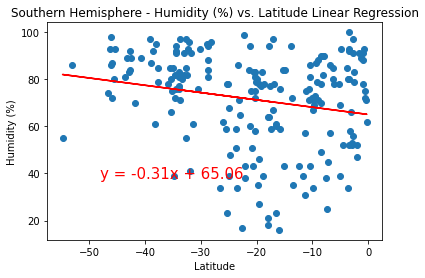

In [51]:
#correlation coefficient
r_south_lat_humidity = south_df['Lat'].corr(south_df['Humidity'])

#label the plot and add linear regression line
x_values = south_df['Lat']
y_values = south_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the information and label
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(100, 100),xycoords='figure points',fontsize=15,color="red");
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude');
plt.ylabel('Humidity (%)');


print(f"The r value is: {r_south_lat_humidity}")
plt.savefig("SouthHumidityvsLatitudeRegression.png")

The charts above show the relationship between humidity and max temperature separated in to the northern and souther hemispheres. We can see that there is not a strong correlation here.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: -0.07927186415956185


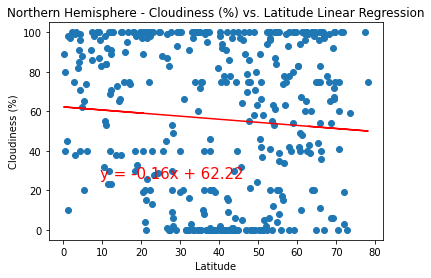

In [52]:
#correlation coefficient
r_north_lat_cloudiness = north_df['Lat'].corr(north_df['Cloudiness'])

#label the plot and add linear regression line
x_values = north_df['Lat']
y_values = north_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the information and label
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(100, 100),xycoords='figure points',fontsize=15,color="red");
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude');
plt.ylabel('Cloudiness (%)');


print(f"The r value is: {r_north_lat_cloudiness}")
plt.savefig("NorthCloudinessvsLatitudeRegression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: -0.03419163099787672


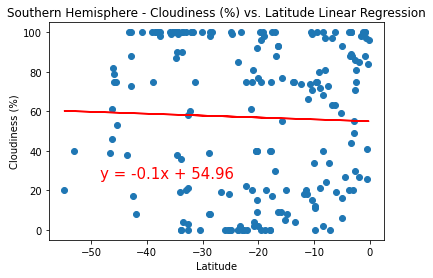

In [53]:
#correlation coefficient
r_south_lat_cloudiness = south_df['Lat'].corr(south_df['Cloudiness'])

#label the plot and add linear regression line
x_values = south_df['Lat']
y_values = south_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the information and label
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(100, 100),xycoords='figure points',fontsize=15,color="red");
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude');
plt.ylabel('Cloudiness (%)');


print(f"The r value is: {r_south_lat_cloudiness}")
plt.savefig("SouthCloudinesspvsLatitudeRegression.png")

The charts above show the relationship between cloudiness and max temperature separated in to the northern and souther hemispheres. We can see that there is not a strong correlation here.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.05515157287034448


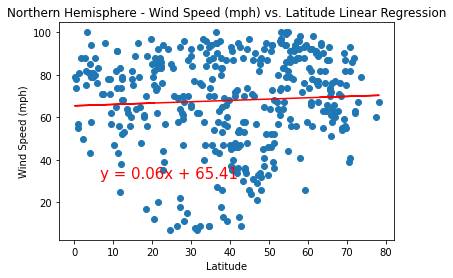

In [54]:
#correlation coefficient
r_north_lat_wind_speed = north_df['Lat'].corr(north_df['Wind Speed'])

#label the plot and add linear regression line
x_values = north_df['Lat']
y_values = north_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the information and label
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(100, 100),xycoords='figure points',fontsize=15,color="red");
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude');
plt.ylabel('Wind Speed (mph)');

print(f"The r value is: {r_north_lat_wind_speed}")
plt.savefig("NorthWindSpeedvsLatitudeRegression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.20914018982883162


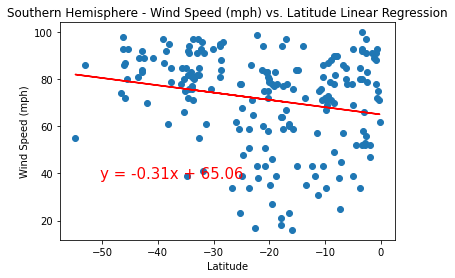

In [55]:
#correlation coefficient
r_south_lat_wind_speed = south_df['Lat'].corr(south_df['Wind Speed'])

#label the plot and add linear regression line
x_values = south_df['Lat']
y_values = south_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the information and label
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(100, 100),xycoords='figure points',fontsize=15,color="red");
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude');
plt.ylabel('Wind Speed (mph)');

print(f"The r value is: {r_south_lat_wind_speed}")
plt.savefig("SouthWindSpeedvsLatitudeRegression.png")

The charts above show the relationship between windiness and max temperature separated in to the northern and souther hemispheres. We can see that there is not a strong correlation here.